In [169]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [18]:
pd.set_option('display.max_columns', 500)

# Business

In [91]:
with open('yelp_dataset/business.json') as f:
    data = [json.loads(line) for line in f]
bz = pd.DataFrame(data)
bz = bz.sample(frac=0.05, replace=False, random_state=1)

In [92]:
bz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
57697,ku9ak9cQnIGBCXBtRd61tQ,Spoke & Wheel - Phoenix,8525 N Central Ave,Phoenix,AZ,85020,33.561236,-112.073740,4.0,319,1,"{'GoodForKids': 'True', 'RestaurantsGoodForGro...","Sandwiches, Beer, Wine & Spirits, Beer Bar, Ba...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
34476,VG2Tu9i-ZOwTVlUktTGE9w,ALDI,3089 Sussex Ave,Pittsburgh,PA,15226,40.383805,-80.014104,3.5,13,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Grocery","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
43742,OAazmHOQ9FUkMhJD7IuiUA,Muttley Crue Organics,"620 46th Avenue NE, Suite 112",Calgary,AB,T2E 0C1,51.094810,-114.050533,4.5,19,1,None,"Pet Sitting, Pets, Pet Services, Pet Groomers,...","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."
48670,1ktw2saTrIr_YJSxQjhnpg,Urban Kitchen & Deli,9751 Chester Ave,Cleveland,OH,44106,41.505688,-81.619490,4.0,54,1,"{'HasTV': 'True', 'WiFi': 'u'free'', 'Restaura...","Halal, Restaurants, Desserts, Breakfast & Brun...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-21:0', '..."
15857,AQxTDiy8tXoL7c8swfuQ1w,Vic Pierce Liquor,609 N Sherman Ave,Madison,WI,53704,43.107572,-89.363083,4.5,4,1,"{'RestaurantsPriceRange2': '2', 'Caters': 'Fal...","Beer, Wine & Spirits, Food","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."


In [90]:
bz.shape

(9630, 14)

In [13]:
bz.drop(['address','postal_code','latitude','longitude','hours'],axis=1,inplace=True)

In [14]:
check = bz.drop(['attributes'],axis=1)
pd.DataFrame({'count':check.count(),'unique':check.nunique(),'null count':check.isnull().sum()})

,count,unique,null count
business_id,192609,192609,0
name,192609,145046,0
city,192609,1204,0
state,192609,36,0
stars,192609,9,0
review_count,192609,1184,0
is_open,192609,2,0
categories,192127,93385,482


In [23]:
bz.head()

,business_id,name,city,state,stars,review_count,is_open,attributes,categories
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,Phoenix,AZ,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life"
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese"
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,Goodyear,AZ,5.0,3,1,None,"Insurance, Financial Services"
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,Charlotte,NC,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi..."


In [68]:
def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        tmp = pd.DataFrame((d for idx, d in df[column].iteritems()))
        ret = pd.concat([df.drop(column,axis=1), tmp], axis=1)
    else:
        tmp = pd.DataFrame((d for idx, d in 
        df[column].iteritems())).fillna(fillna)
        ret = pd.concat([df.drop(column,axis=1), tmp], axis=1)
    return ret

In [94]:
x = bz['attributes'][:5].apply(pd.Series)
x

,GoodForKids,RestaurantsGoodForGroups,Alcohol,BusinessParking,BusinessAcceptsCreditCards,RestaurantsDelivery,Ambience,Caters,BikeParking,OutdoorSeating,HasTV,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsAttire,NoiseLevel,WiFi,RestaurantsReservations,GoodForMeal,DriveThru,RestaurantsTableService,WheelchairAccessible
57697,True,True,u'full_bar',"{'garage': False, 'street': False, 'validated'...",True,False,"{'romantic': False, 'intimate': False, 'touris...",False,True,True,True,2,True,u'casual',u'average',u'free',True,"{'dessert': False, 'latenight': False, 'lunch'...",False,NaN,NaN
34476,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",False,NaN,NaN,NaN,False,NaN,NaN,1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48670,True,True,u'none',"{'garage': False, 'street': False, 'validated'...",True,True,"{'touristy': False, 'hipster': False, 'romanti...",True,True,True,True,2,True,u'casual',u'quiet',u'free',True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,True,True
15857,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,False,True,NaN,NaN,2,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# import ast
# x['GoodForMeal'].where(x['GoodForMeal'].isnull(),ast.literal_eval(x['GoodForMeal']))
type(x['Ambience'].iloc[0]

str

# User

In [226]:
us = pd.read_csv('sample_dataset/user_sample.csv')
us.rename(columns={'Unnamed: 0':'ix'},inplace=True)
us.set_index('ix',inplace=True)

In [232]:
us.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliments
ix,,,,,,,,,,,,
888070,TQnJM4pv9pxwRt64Gj5JfA,Amy,5,2012-11-04 11:58:43,5,0,1,NaN,2,0,5.00,1
786620,_I148UPrAgo-SZ9qOkwX3A,Pat,1,2018-10-24 20:15:13,0,0,0,NaN,8,0,4.00,0
43384,1e4CMKgujUHagjQgv3NVCA,Carlos,11,2014-06-14 18:07:23,1,2,2,NaN,364,0,4.50,0
12854,F0nR2cEBLSZtBb2hlxnpoA,May,159,2006-06-22 04:29:33,173,59,74,"2015,2016,2017",447,12,4.06,31
394483,B1SdzXmYZvK7QZwZ1g_XCg,Marlene,8,2015-06-20 00:57:29,3,1,0,NaN,8,0,3.78,0


In [119]:
us.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [120]:
pd.DataFrame({'count':us.count(),'unique':us.nunique(),'null count':us.isnull().sum()})

,count,unique,null count
user_id,81857,81857,0
name,81857,14886,0
review_count,81857,737,0
yelping_since,81857,81839,0
useful,81857,1221,0
funny,81857,796,0
cool,81857,889,0
elite,3584,197,78273
friends,81857,47521,0
fans,81857,198,0


In [21]:
# get the average of the # of compliments in each category
# could be that they are inclined to go to more restaurants due to more compliments
us.filter(regex='compliment').agg({'mean'})

,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
mean,2.228435,0.307561,0.182855,0.163651,0.059714,1.343172,2.749075,2.938796,2.938796,1.073066,1.067545


In [231]:
# aggregate the # of compliments into 'compliments' column
# then drop all individual compliments columns
us['compliments'] = us.filter(regex='compliment').sum(axis=1)
us.drop(list(us.filter(regex='compliment_')),axis=1,inplace=True)

# convert to datetime yelping_since
us['yelping_since'] = pd.to_datetime(us['yelping_since'])

# aggregate count of friends instead of having list of friends
us['friends'] = us['friends'].apply(lambda x:len(x.split(',')))

In [137]:
max(us['review_count'])

12390

In [139]:
us['review_count']

ix
888070       5
786620       1
43384       11
12854      159
394483       8
          ... 
534886      37
1471474      1
667752       3
303412       3
1146079      2
Name: review_count, Length: 81857, dtype: int64

(array([38702., 14803., 11411.,  4955.,  2710.,  1959.]),
 array([ 0,  5, 10, 20, 30, 40, 50]),
 <a list of 6 Patch objects>)

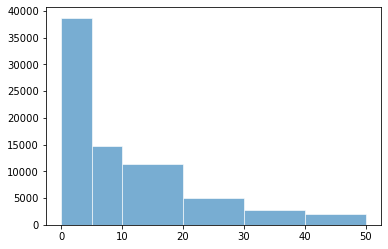

In [167]:
# check the distribution of review counts
plt.hist(us['review_count'],bins=[0, 5, 10, 20, 30, 40, 50],alpha=0.6,ec='white')

<BarContainer object of 15 artists>

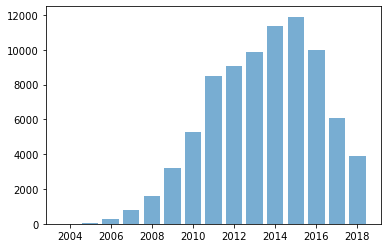

In [216]:
# check the distribution of yelp_since years
x = us.groupby(us["yelping_since"].dt.year).count()['user_id']
plt.bar(x.index, x, alpha=0.6)

In [185]:
# how many have never been elite?
us['elite'].isnull().sum()
# us['elite'][us['elite'].isnull()==False].count()

78273

# Reviews

In [124]:
rv = pd.read_csv('sample_dataset/review_sample.csv')
rv.rename(columns={'Unnamed: 0':'ix'},inplace=True)
rv.set_index('ix',inplace=True)

In [125]:
rv.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
ix,,,,,,,,,
4634629,xw37uw9b2wFwVRLXSCtgNg,tIau2r-ox1LhC38wXX6oew,IUoj0ORP1VAV9xx4dmHP9g,5.0,0,0,0,I love this location and have been a customer ...,2018-09-07 20:41:56
4349124,jKxK47dz6D-ZpKqmd-oTeA,q0lV9MoRYDhyoLAQ9X91iA,hihud--QRriCYZw1zZvW4g,1.0,0,0,0,I think that the food is not at all authentic ...,2018-01-03 03:57:16
6056428,boaG5qtsdwR3KBwQbvnfAg,kUE8PMxx2_HTT32T16Z8Aw,zT3IxSfolhu4qU0tV0pTjg,2.0,1,0,0,If you schedule your appointment late in the a...,2018-06-27 01:40:52
1713906,ah5BuOXlUwUIfSYHPa9Syg,0wOrT_OF0QN7bWlbgCc2ww,em__JLa6eEyYXzMbbVEahQ,5.0,0,0,0,Wow! What can I say about Shauna? Plenty of th...,2013-07-08 06:53:20
3794033,TB2cTa0ji3JaYbInQN_nqQ,oKhpMYvIntENZ5UzuoZWUg,1KhBzrqmU164bss64jR5uA,4.0,0,0,0,Fun night of karaoke. Food good...lady barten...,2016-03-16 05:56:01


In [126]:
pd.DataFrame({'count':rv.count(),'unique':rv.nunique(),'null count':rv.isnull().sum()})

,count,unique,null count
review_id,334295,334295,0
user_id,334295,226123,0
business_id,334295,91031,0
stars,334295,5,0
useful,334295,125,0
funny,334295,99,0
cool,334295,99,0
text,334295,334254,0
date,334295,333952,0


In [233]:
# what is the average star rating for a restaurant on yelp
rv.agg({'stars':'mean'})

stars    3.7157
dtype: float64

In [235]:
# aggregate the number of votes people casted on a review for each user
# use this value to make a new column in user column
rv.groupby('user_id').agg({'useful':'sum','funny':'sum','cool':'sum'}).sum(axis=1)

user_id
---1lKK3aKOuomHnwAkAow     21
--0kuuLmuYBe3Rmu0Iycww      5
--2HUmLkcNHZp0xw6AMBPg      0
--2PnhMMH7EYoY3wywOvgQ      4
--2vR0DIsmQ6WfcSzKWigw    657
                         ... 
zzsmdXHUFBYuKUtPbXWjRA      1
zzsw8F_LGVU-L7hb8357Fw      0
zztIVfCNMpfvCU7yEjDDVw      0
zzzAgDDWe4PTnJuwhi3XQQ      1
zzzTrQ2bkvteEngjkXCTAA      0
Length: 226123, dtype: int64

In [241]:
# want to map the number of votes for reviews users wrote but the numbers don't match up
# it's because it's a sample of the dataset
print('# of userID for user.json: {}'.format(us['user_id'].nunique()))
print('# of userID for reviews.json: {}'.format(rv['user_id'].nunique()))

# of userID for user.json: 81857
# of userID for reviews.json: 226123
